<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Perceptron_trick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Creating Data for algo Implementation:

In [93]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                          n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False, class_sep=10
                          )

In [94]:
np.insert(X,0,1,axis=1)

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

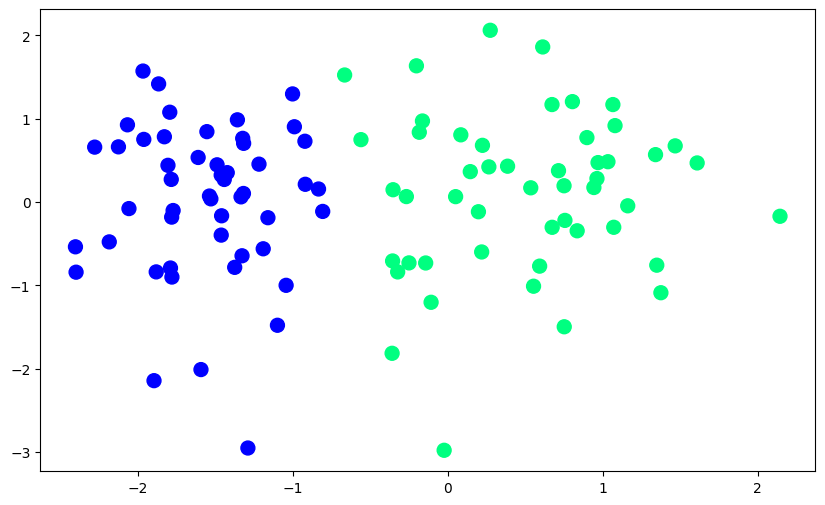

In [95]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Creating a Perceptron class:

In [96]:
def perceptron(X,y):
  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1       # Learning Rate
  Epochs  = 1000
  for i in range(Epochs):
    j = np.random.randint(0,100)
    y_hat  = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]
  return weights[0],weights[1:]

In [97]:
np.ones(3)

array([1., 1., 1.])

In [98]:
np.dot(np.insert(X[41],0,1),[1,1,1,])
step(0.24)

1

In [99]:
def step(z):
  return 1 if z>0 else 0
intercept_,coef_ = perceptron(X,y)
print(coef_)
print(intercept_)

[1.3370189  0.04471315]
1.0


In [100]:
m = -(coef_[0]/coef_[1])         # m(slope) = -A/B  what we did here
b = -(intercept_/coef_[1])       # b(bias) = -C/B  what we did here

In [101]:
X_input = np.linspace(-3,3,100)
y_input = m*X_input + b

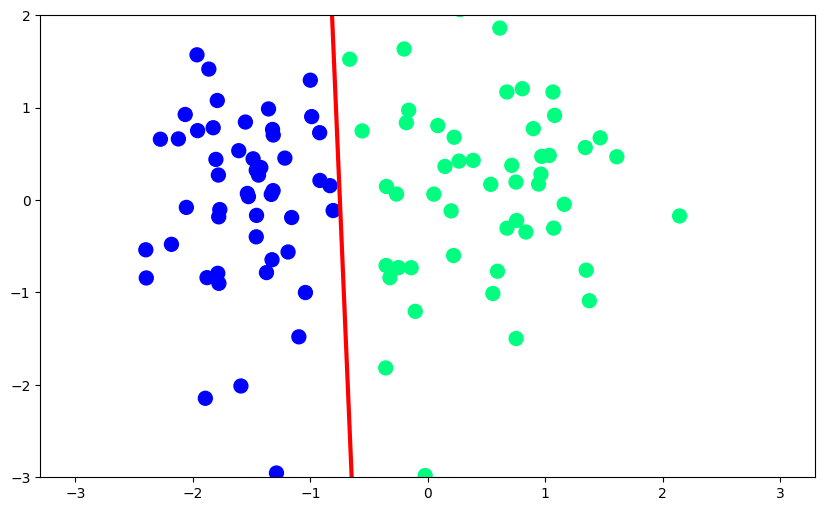

In [102]:
plt.figure(figsize=(10,6))
plt.plot(X_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()

# Let's do some observations now:


In [103]:
import numpy as np

def perceptron(X, y, lr=0.1, epochs=50):
    w = np.zeros(X.shape[1])
    b = 0

    slopes = []
    intercepts = []

    for epoch in range(epochs):
        for i in range(len(X)):
            z = np.dot(X[i], w) + b
            y_hat = 1 if z >= 0 else 0

            w += lr * (y[i] - y_hat) * X[i]
            b += lr * (y[i] - y_hat)

        # save line params
        if w[1] != 0:
            slopes.append(-w[0] / w[1])
            intercepts.append(-b / w[1])

    return slopes, intercepts


In [104]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

m, c = perceptron(X, y)

fig, ax = plt.subplots(figsize=(8,6))
x_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)

scatter = ax.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
line, = ax.plot([], [], 'r-', linewidth=2)

def update(i):
    y_vals = m[i] * x_vals + c[i]
    line.set_data(x_vals, y_vals)
    ax.set_title(f"Epoch {i+1}")
    return line,

ani = FuncAnimation(fig, update, frames=len(m), interval=200)
plt.close() # Close the plot to prevent it from showing an empty figure
HTML(ani.to_jshtml())